# Project Plan

#### Task: 
Collect and analyze weather data across cities worldwide.

#### Purpose: 
PlanMyTrip will use the data to recommend ideal hotels based on clients’ weather preferences.

#### Method: 
Create a Pandas DataFrame with 500 or more of the world’s unique cities and their weather data in real time. This process will entail collecting, analyzing, and visualizing the data.

---

# Collect the Data


#### Use the NumPy module to generate more than 1,500 random latitudes and longitudes.


In [1]:
# Import Dependencies:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs) # packs each lat/lng pair into a tuple based on shared index
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

#### Use the citipy module to list the nearest city to the latitudes and longitudes.


In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

644

#### Use the OpenWeatherMap API to request the current weather data from each unique city in your list.


In [6]:
# import the requests library
import requests

# import the API key from the config file
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

# for farenheit, use units=imperial
# for celsius, use units=metric
# no units described will output in Kelvin

# this output link will result in an error because we have not defined the city

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=de50e0a22fe7288323c5c95b38f21b89


In [8]:
# Create an endpoint URL for a city.

city_url = url + "&q=" + "Boston"
print(city_url)

# to make this readable, add JSONView Chrome extension

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=de50e0a22fe7288323c5c95b38f21b89&q=Boston


#### Parse the JSON data from the API request.


In [9]:
# JSON = JavaScript Object Notation

# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

# Request methods:
# get(): retreives data from a web source
# head(): displays header info of data
# post(): Adds or annotates data on a web source. Used on mailing groups, message boards, or comments.
# put(): Updates an existing resource. For example, if the date on a Wikipedia page is wrong, you can use the put() method to update that date.
# delete(): deletes data from a web source
# options(): Discovers what HTTP methods a web source allows.
# patch(): partially modifies a data source

<Response [200]>

In [10]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [11]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.06,"lat":42.36},"weather":[{"id":802,"main":"Clouds","description":"scattered clouds","icon":"03d"}],"base":"stations","main":{"temp":61.81,"feels_like":58.68,"temp_min":57.99,"temp_max":64.99,"pressure":1032,"humidity":77},"visibility":16093,"wind":{"speed":8.05,"deg":50},"clouds":{"all":40},"dt":1592228578,"sys":{"type":1,"id":3486,"country":"US","sunrise":1592212013,"sunset":1592266974},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [12]:
# Get the text of the 'get' request in JSON format
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 61.81,
  'feels_like': 58.68,
  'temp_min': 57.99,
  'temp_max': 64.99,
  'pressure': 1032,
  'humidity': 77},
 'visibility': 16093,
 'wind': {'speed': 8.05, 'deg': 50},
 'clouds': {'all': 40},
 'dt': 1592228578,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1592212013,
  'sunset': 1592266974},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [13]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


#### Collect the following data from the JSON file and add it to a DataFrame:
    - City, country, and date
    - Latitude and longitude
    - Maximum temperature
    - Humidity
    - Cloudiness
    - Wind speed

##### Example: use Boston as a sample - can delete this later

In [14]:
# Get the JSON data.
boston_data = city_weather.json()
boston_data["dt"]
boston_data["coord"]["lat"]

42.36

In [15]:
# get lat, long, max temp, humidity, cloudiness, and wind speed:

lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.36 -71.06 64.99 77 40 8.05


In [16]:
# get date -- need to use datetime

# Import the datetime module from the datetime library.
from datetime import datetime

# Get the date from the JSON file.
date = boston_data["dt"]

# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)


datetime.datetime(2020, 6, 15, 13, 42, 58)

In [17]:
# format properly:

datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

# end sample

'2020-06-15 13:42:58'

In [18]:
# now, get the information for all the cities into a dataframe

# Import the datetime module from the datetime library.
from datetime import datetime

In [19]:
# get a list that processes every name for validity (use try-except block)

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | upernavik
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | belmonte
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | port macquarie
Processing Record 8 of Set 1 | airai
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | vila franca do campo
Processing Record 11 of Set 1 | inhambane
Processing Record 12 of Set 1 | liverpool
Processing Record 13 of Set 1 | coruripe
Processing Record 14 of Set 1 | moindou
Processing Record 15 of Set 1 | alice springs
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | rolla
Processing Record 18 of Set 1 | inza
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | tuktoyaktuk
Processing Record 22 of Set 1 | punta arenas
Processing Record 23 of Set 

Processing Record 38 of Set 4 | talaya
Processing Record 39 of Set 4 | louisbourg
City not found. Skipping...
Processing Record 40 of Set 4 | bredasdorp
Processing Record 41 of Set 4 | shelburne
Processing Record 42 of Set 4 | mbala
Processing Record 43 of Set 4 | meulaboh
Processing Record 44 of Set 4 | muhldorf
Processing Record 45 of Set 4 | evensk
Processing Record 46 of Set 4 | korhogo
Processing Record 47 of Set 4 | severo-kurilsk
Processing Record 48 of Set 4 | poum
Processing Record 49 of Set 4 | chibombo
Processing Record 50 of Set 4 | bowen
Processing Record 1 of Set 5 | borogontsy
Processing Record 2 of Set 5 | kahna nau
Processing Record 3 of Set 5 | petropavlovsk-kamchatskiy
Processing Record 4 of Set 5 | uren
Processing Record 5 of Set 5 | hami
Processing Record 6 of Set 5 | saint-francois
Processing Record 7 of Set 5 | east london
Processing Record 8 of Set 5 | pevek
Processing Record 9 of Set 5 | portland
Processing Record 10 of Set 5 | puerto escondido
Processing Recor

Processing Record 25 of Set 8 | praia da vitoria
Processing Record 26 of Set 8 | arraial do cabo
Processing Record 27 of Set 8 | thurles
Processing Record 28 of Set 8 | berlevag
Processing Record 29 of Set 8 | ocos
Processing Record 30 of Set 8 | hurricane
Processing Record 31 of Set 8 | gore
Processing Record 32 of Set 8 | itapetininga
Processing Record 33 of Set 8 | lata
Processing Record 34 of Set 8 | geraldton
Processing Record 35 of Set 8 | yumen
Processing Record 36 of Set 8 | porto novo
Processing Record 37 of Set 8 | margate
Processing Record 38 of Set 8 | tougue
Processing Record 39 of Set 8 | santa catalina
Processing Record 40 of Set 8 | los llanos de aridane
Processing Record 41 of Set 8 | novoagansk
Processing Record 42 of Set 8 | svetlogorsk
Processing Record 43 of Set 8 | ponta delgada
Processing Record 44 of Set 8 | hunza
City not found. Skipping...
Processing Record 45 of Set 8 | achutupo
Processing Record 46 of Set 8 | tual
Processing Record 47 of Set 8 | weyburn
Proc

Processing Record 16 of Set 12 | maposeni
Processing Record 17 of Set 12 | kahului
Processing Record 18 of Set 12 | fontem
Processing Record 19 of Set 12 | valparaiso
Processing Record 20 of Set 12 | hervey bay
Processing Record 21 of Set 12 | tecoanapa
Processing Record 22 of Set 12 | unity
Processing Record 23 of Set 12 | llangefni
Processing Record 24 of Set 12 | xingcheng
Processing Record 25 of Set 12 | thiruvananthapuram
Processing Record 26 of Set 12 | punuare
Processing Record 27 of Set 12 | vangaindrano
Processing Record 28 of Set 12 | scottsburgh
City not found. Skipping...
Processing Record 29 of Set 12 | porto belo
Processing Record 30 of Set 12 | yerbogachen
Processing Record 31 of Set 12 | urumqi
Processing Record 32 of Set 12 | port moresby
Processing Record 33 of Set 12 | kidal
Processing Record 34 of Set 12 | ndele
Processing Record 35 of Set 12 | komsomolsk-na-amure
Processing Record 36 of Set 12 | nouadhibou
Processing Record 37 of Set 12 | hihifo
City not found. Ski

In [20]:
# create the dataframe with city data

# city_data is the dictionary we have with all the info. 

city_data_df = pd.DataFrame(city_data)

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Upernavik,72.79,-56.15,34.29,89,100,4.85,GL,2020-06-15 13:47:32
1,Cape Town,-33.93,18.42,63.00,63,20,13.87,ZA,2020-06-15 13:42:19
2,Ushuaia,-54.80,-68.30,39.20,88,75,4.70,AR,2020-06-15 13:55:30
3,Mataura,-46.19,168.86,43.38,91,0,3.51,NZ,2020-06-15 13:55:30
4,Belmonte,-15.86,-38.88,75.20,78,75,8.05,BR,2020-06-15 13:55:31


In [21]:
# reorder columns

column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

city_data_df = city_data_df[column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Upernavik,GL,2020-06-15 13:47:32,72.79,-56.15,34.29,89,100,4.85
1,Cape Town,ZA,2020-06-15 13:42:19,-33.93,18.42,63.00,63,20,13.87
2,Ushuaia,AR,2020-06-15 13:55:30,-54.80,-68.30,39.20,88,75,4.70
3,Mataura,NZ,2020-06-15 13:55:30,-46.19,168.86,43.38,91,0,3.51
4,Belmonte,BR,2020-06-15 13:55:31,-15.86,-38.88,75.20,78,75,8.05


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# The last line in the code block will export the DataFrame to a CSV file, with the index label (or column A) header as “City_ID.” 
#If we ever need to export the CSV file to a DataFrame, that header will be present in the DataFrame.

# Exploratory Analysis with Visualization


#### Create scatter plots of the weather data for the following comparisons:
    - Latitude versus temperature
    - Latitude versus humidity
    - Latitude versus cloudiness
    - Latitude versus wind speed

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [24]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1592229422.3419552

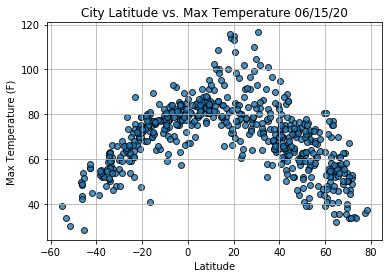

In [25]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/lat_v_maxt.png")

# Show plot.
plt.show()

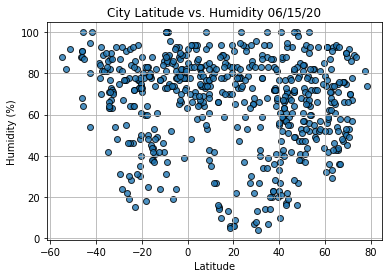

In [26]:
# Build the scatter plot for latitude vs. humidity.

plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/lat_v_hum.png")

# Show plot.
plt.show()

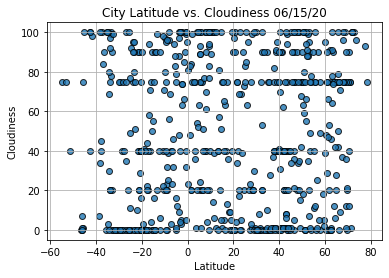

In [27]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/lat_v_cloud.png")

# Show plot.
plt.show()

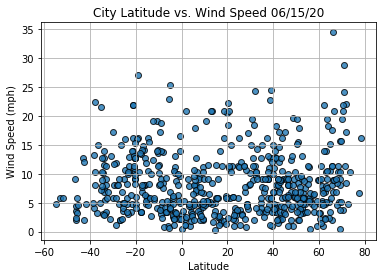

In [28]:
# Build the scatter plot for latitude vs. wind speed.

plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/lat_v_wind.png")

# Show plot.
plt.show()

#### Determine the correlations for the following weather data:
    - Latitude and temperature
    - Latitude and humidity
    - Latitude and cloudiness
    - Latitude and wind speed

#### Create a series of heatmaps using the Google Maps and Places API that showcases the following:
    - Latitude and temperature
    - Latitude and humidity
    - Latitude and cloudiness
    - Latitude and wind speed

# Visualize Travel Data
#### Create a heatmap with pop-up markers that can display information on specific cities based on a customer’s travel preferences. 


#### Complete these steps:
    - Filter the Pandas DataFrame based on user inputs for a minimum and maximum temperature.
    - Create a heatmap for the new DataFrame.
    - Find a hotel from the cities’ coordinates using Google’s Maps and Places API, and Search Nearby feature.
    - Store the name of the first hotel in the DataFrame.
    - Add pop-up markers to the heatmap that display information about the city, current maximum temperature, and a hotel in the city.